<a href="https://colab.research.google.com/github/ANSHIKA1806/Data_Analysis/blob/main/US_Accidents_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [42]:
df = pd.read_csv('/content/US_Accidents_Dec20_updated.csv')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day


In [43]:
df.tail()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
291090,A-3008485,2,2020-12-17 16:44:00,2020-12-17 18:50:27,39.284180,-76.735092,39.286420,-76.738652,0.245,I-695 INNER LOOP AT EXIT 15A US 40 BALTO NATIO...,NaN,I-695 N,R,Catonsville,Baltimore County,MD,21228,US,US/Eastern,KDMH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
291091,A-3008486,2,2020-11-22 00:03:00,2020-11-22 02:11:00,32.757916,-117.216232,32.759628,-117.200661,0.912,Slow traffic on I-8 E - Kumeyaay Highway from ...,NaN,I-8 E,R,San Diego,San Diego,CA,92110,US,US/Pacific,KSAN,2020-11-22 00:51:00,55.0,55.0,83.0,29.99,5.0,CALM,0.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
291092,A-3008487,2,2020-11-03 22:59:10,2020-11-04 00:12:24,35.899897,-78.615492,35.910717,-78.646822,1.906,Slow traffic on I-540 from Falls of Neuse Rd/E...,NaN,I-540 W,R,Raleigh,Wake,NC,27615,US,US/Eastern,KRDU,2020-11-03 22:51:00,43.0,43.0,86.0,29.89,10.0,CALM,0.0,0.0,Fair,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Night
291093,A-3008488,2,2020-12-13 04:48:06,2020-12-13 07:03:41,39.075182,-76.946107,39.079332,-76.954897,0.552,Incident on MD-200 WB near EXIT 17 Drive with ...,NaN,Inter County Connector W,R,Silver Spring,Montgomery,MD,20904,US,US/Eastern,KCGS,2020-12-13 04:55:00,44.0,44.0,93.0,29.91,2.0,CALM,0.0,0.0,Fair,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Night
291094,A-3008489,2,2020-11-29 00:56:44,2020-11-29 02:33:42,39.079324,-76.954904,39.082114,-76.960174,0.342,Incident on MD-200 WB near MM 16 Drive with ca...,NaN,Inter County C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291095 entries, 0 to 291094
Data columns (total 47 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     291095 non-null  object 
 1   Severity               291095 non-null  int64  
 2   Start_Time             291095 non-null  object 
 3   End_Time               291095 non-null  object 
 4   Start_Lat              291095 non-null  float64
 5   Start_Lng              291095 non-null  float64
 6   End_Lat                291095 non-null  float64
 7   End_Lng                291095 non-null  float64
 8   Distance(mi)           291095 non-null  float64
 9   Description            291095 non-null  object 
 10  Number                 76431 non-null   float64
 11  Street                 291095 non-null  object 
 12  Side                   291094 non-null  object 
 13  City                   291068 non-null  object 
 14  County                 291094 non-nu

In [45]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,291095.000000,291095.000000,291095.000000,291095.000000,291095.000000,291095.000000,76431.000000,284130.00000,86580.000000,283735.000000,285490.000000,283508.000000,249917.000000,79117.000000
mean,2.344358,36.732589,-95.240277,36.732695,-95.240104,0.723836,7385.389933,62.36831,43.655855,64.476857,29.896437,9.280483,8.665155,0.026745
std,0.653119,5.080399,17.566584,5.080506,17.566541,1.730240,13947.444483,18.40335,22.045683,22.411779,0.546276,2.904595,5.638757,0.313051
min,1.000000,24.577410,-124.483021,24.576882,-124.482798,0.000000,1.000000,-58.00000,-58.000000,2.000000,0.020000,0.000000,0.000000,0.000000
25%,2.000000,33.737412,-117.348665,33.737860,-117.348518,0.103000,1099.000000,50.20000,28.700000,48.000000,29.860000,10.000000,5.000000,0.000000
50%,2.000000,37.311310,-88.074560,37.309960,-88.074230,0.368000,3655.000000,64.00000,41.000000,66.000000,29.980000,10.000000,8.100000,0.000000
75%,2.000000,40.734465,-80.752490,40.734370,-80.752327,0.701000,9050.500000,75.90000,61.000000,83.000000,30.100000,10.000000,11.500000,0.000000
max,4.000000,49.000580,-67.113167,49.075000,-67.109242,151.525000,851799.000000,129.20000,111.000000,100.000000,38.940000,111.000000,822.800000,10.020000


In [46]:
 rows = len(df.axes[0])
 col = len(df.axes[1])
 print ( rows ," rows")
 print (col, "columns")

291095  rows
47 columns


In [47]:
missing_percentages = df.isna().sum().sort_values(ascending =False)
missing_percentages

Number                   214664
Precipitation(in)        211978
Wind_Chill(F)            204515
Wind_Speed(mph)           41178
Visibility(mi)             7587
Weather_Condition          7470
Humidity(%)                7360
Temperature(F)             6965
Pressure(in)               5605
Wind_Direction             4293
Weather_Timestamp          3851
Airport_Code                552
Timezone                    234
Zipcode                     182
City                         27
Nautical_Twilight            27
Astronomical_Twilight        27
Civil_Twilight               27
Sunrise_Sunset               27
Amenity                       1
Traffic_Calming               1
Side                          1
Bump                          1
State                         1
Turning_Loop                  1
Country                       1
Traffic_Signal                1
County                        1
Stop                          1
Roundabout                    1
Railway                       1
No_Exit 

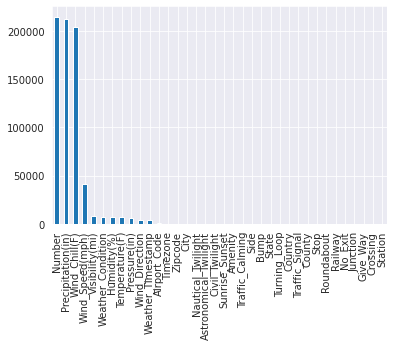

In [48]:
missing_percentages[missing_percentages != 0].plot(kind='bar')

In [49]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [50]:
Cities = df.City.unique()
len(Cities)

8077

In [51]:
acc_cities = df.City.value_counts()
acc_cities

Charlotte             9414
Houston               6651
Los Angeles           6515
Miami                 6357
Dallas                5671
                      ... 
Howland                  1
Lewiston Woodville       1
Beasley                  1
Fort Gratiot             1
Mill City                1
Name: City, Length: 8076, dtype: int64

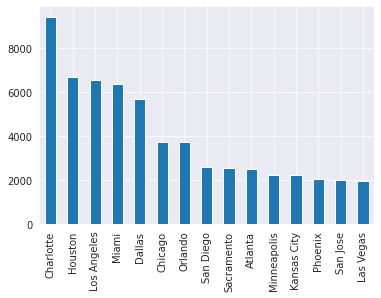

In [52]:

acc_cities[:15].plot( kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


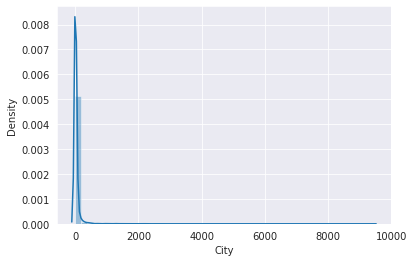

In [53]:
sns.distplot(acc_cities)

In [54]:
high = acc_cities[acc_cities >=1000]
low = acc_cities[acc_cities <=1000]
print(high)

Charlotte          9414
Houston            6651
Los Angeles        6515
Miami              6357
Dallas             5671
Chicago            3725
Orlando            3712
San Diego          2560
Sacramento         2524
Atlanta            2463
Minneapolis        2217
Kansas City        2215
Phoenix            2018
San Jose           1975
Las Vegas          1927
Saint Louis        1845
Raleigh            1757
Saint Paul         1711
Seattle            1676
Nashville          1590
Detroit            1500
Jacksonville       1451
Tampa              1405
Bronx              1389
Fort Worth         1347
Fort Lauderdale    1291
Austin             1283
Riverside          1268
Columbus           1260
Oakland            1255
Milwaukee          1245
Philadelphia       1181
Indianapolis       1151
New York           1091
Long Beach         1069
Brooklyn           1057
Corona             1020
Name: City, dtype: int64


In [55]:
len(high)

37

In [56]:
len(low)


8039

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


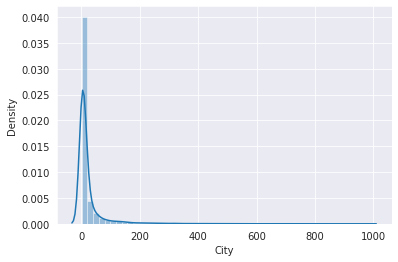

In [57]:
sns.distplot(low)

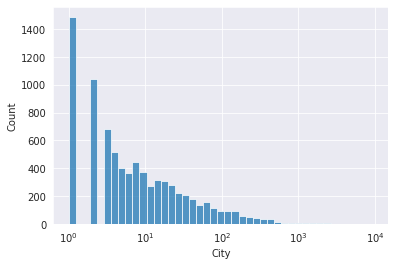

In [58]:
 sns.histplot(acc_cities,log_scale=True)

In [59]:
acc_cities[acc_cities==2]

Chocorua         2
Strykersville    2
Paragould        2
Hamptonville     2
El Portal        2
                ..
Towanda          2
Maljamar         2
Demorest         2
Falls Village    2
Pendroy          2
Name: City, Length: 1042, dtype: int64

In [64]:
df.Start_Time = pd.to_datetime(df.Start_Time)
df.Start_Time

0        2016-02-08 00:37:08
1        2016-02-08 05:56:20
2        2016-02-08 06:15:39
3        2016-02-08 06:15:39
4        2016-02-08 06:51:45
                 ...        
291090   2020-12-17 16:44:00
291091   2020-11-22 00:03:00
291092   2020-11-03 22:59:10
291093   2020-12-13 04:48:06
291094   2020-11-29 00:56:44
Name: Start_Time, Length: 291095, dtype: datetime64[ns]

In [65]:
df.Start_Time.dt.hour

0          0
1          5
2          6
3          6
4          6
          ..
291090    16
291091     0
291092    22
291093     4
291094     0
Name: Start_Time, Length: 291095, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


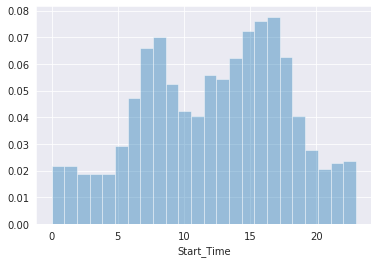

In [61]:
sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


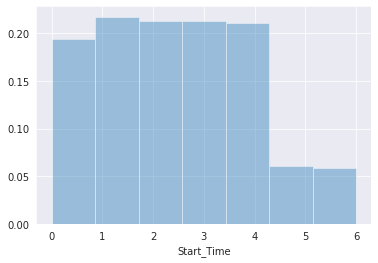

In [62]:
sns.distplot(df.Start_Time.dt.dayofweek, bins=7 , kde=False , norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


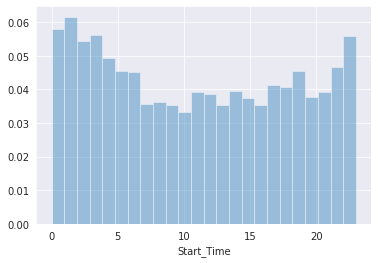

In [63]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


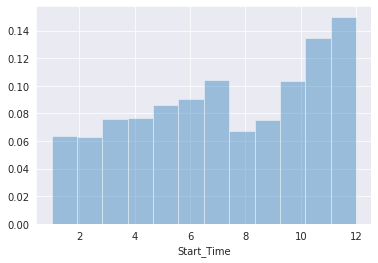

In [66]:
df_2016 =df.Start_Time.dt.year ==2016
sns.distplot(df.Start_Time.dt.month,bins=12,kde =False, norm_hist= True)

##Insights 

- No data for New York
- No city has more than 1000 yearly accidents.
- A high percentage of accidents occur between 3PM TO 6PM. 
- On sundays the peak occurs at 12am to 3am.
- Most accidents occur in the monthof November and December.

